<a href="https://colab.research.google.com/github/shreekanthsenthil/SQL-Injection-Detection/blob/master/sqli_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn import preprocessing , neighbors ,svm ##
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn.model_selection import train_test_split
from __future__ import absolute_import, division, print_function, unicode_literals ## 
import tensorflow as tf
import matplotlib.pyplot as plt
# from tensorflow.keras.utils import plot_model


ModuleNotFoundError: No module named 'pandas'

In [3]:
df1 = pd.read_csv("./Data_2/SQLiV3.csv",encoding='utf-8') 
df1.head()

NameError: name 'pd' is not defined

In [ ]:
del df1['Unnamed: 2']
del df1['Unnamed: 3']

In [ ]:
df1.info('Label')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30919 entries, 0 to 30918
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  30904 non-null  object
 1   Label     30664 non-null  object
dtypes: object(2)
memory usage: 483.2+ KB


In [ ]:
df1.describe()

,Sentence,Label
count,30904,30664
unique,30872,42
top,#NAME?,0
freq,8,19268


In [ ]:
df1['Label'].isna().sum() # Count NaN label values

255

In [ ]:
df1= df1.dropna() # Remove Nan values.

In [ ]:
df1 = df1.drop(df1[(df1['Label'] != '0') & (df1['Label'] != '1')].index) # Dropping the label values, that are different from 0 or 1.

In [ ]:
df1['Label'] = df1['Label'].astype('int') # Convert the label type to integer.

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30609 entries, 0 to 30918
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  30609 non-null  object
 1   Label     30609 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 597.8+ KB


In [ ]:
df1.Label.value_counts()

0    19268
1    11341
Name: Label, dtype: int64

In [ ]:
df1=df1.rename(columns={'Sentence':'Query'})

In [ ]:
df1

,Query,Label
0,""" or pg_sleep ( __TIME__ ) --",1
2,AND 1 = utl_inaddr.get_host_address ( ...,1
3,select * from users where id = '1' or @ @1 ...,1
4,"select * from users where id = 1 or 1#"" ( ...",1
5,select name from syscolumns where id = ...,1
...,...,...
30914,DELETE FROM door WHERE grow = 'small',0
30915,DELETE FROM tomorrow,0
30916,SELECT wide ( s ) FROM west,0
30917,SELECT * FROM ( SELECT slide FROM breath ),0


In [ ]:
df1['Length']=df1.Query.map(len)
df1

,Query,Label,Length
0,""" or pg_sleep ( __TIME__ ) --",1,33
2,AND 1 = utl_inaddr.get_host_address ( ...,1,218
3,select * from users where id = '1' or @ @1 ...,1,90
4,"select * from users where id = 1 or 1#"" ( ...",1,85
5,select name from syscolumns where id = ...,1,109
...,...,...,...
30914,DELETE FROM door WHERE grow = 'small',0,37
30915,DELETE FROM tomorrow,0,20
30916,SELECT wide ( s ) FROM west,0,28
30917,SELECT * FROM ( SELECT slide FROM breath ),0,44


In [ ]:
df1.dropna(axis=0,how="all",inplace=True)

In [ ]:
df1

,Query,Label,Length
0,""" or pg_sleep ( __TIME__ ) --",1,33
2,AND 1 = utl_inaddr.get_host_address ( ...,1,218
3,select * from users where id = '1' or @ @1 ...,1,90
4,"select * from users where id = 1 or 1#"" ( ...",1,85
5,select name from syscolumns where id = ...,1,109
...,...,...,...
30914,DELETE FROM door WHERE grow = 'small',0,37
30915,DELETE FROM tomorrow,0,20
30916,SELECT wide ( s ) FROM west,0,28
30917,SELECT * FROM ( SELECT slide FROM breath ),0,44


In [ ]:
def cal_puncndop(df,col,punop_col,l):
  df1 = df[[col]].copy()
  for i, query in enumerate(df[col]):
    count = 0
    li = list(query)
    for ch in range(len(query)):
      if query[ch] in l:
        li [ch] = " "
        #df[col][i] = "".join(li)
        count = count+1
    df1[col][i] = "".join(li)
    #print(("".join(li)))
    df[punop_col][i] = count
  df[col] = df1[col]
  return df  

In [ ]:
df1['operator'] = 0
df=cal_puncndop(df1,'Query','operator',["<",">", "<=", ">=", "=", "==", "!=", "<<", ">>", "|", "&", "-", "+", "%", "^", "*"]) #should * be included becoz count(*) !!!
df1

C:\Users\PC\AppData\Local\Temp\ipykernel_20712\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_20712\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_20712\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\

C:\Users\PC\AppData\Local\Temp\ipykernel_20712\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_20712\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_20712\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\

C:\Users\PC\AppData\Local\Temp\ipykernel_20712\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_20712\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_20712\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\

C:\Users\PC\AppData\Local\Temp\ipykernel_20712\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_20712\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_20712\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\

C:\Users\PC\AppData\Local\Temp\ipykernel_20712\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_20712\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_20712\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\

C:\Users\PC\AppData\Local\Temp\ipykernel_20712\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_20712\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_20712\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\

C:\Users\PC\AppData\Local\Temp\ipykernel_20712\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_20712\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_20712\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\

C:\Users\PC\AppData\Local\Temp\ipykernel_20712\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_20712\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_20712\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\

C:\Users\PC\AppData\Local\Temp\ipykernel_20712\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_20712\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_20712\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\

C:\Users\PC\AppData\Local\Temp\ipykernel_20712\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_20712\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_20712\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\

C:\Users\PC\AppData\Local\Temp\ipykernel_20712\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_20712\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_20712\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\

,Query,Label,Length,operator
0,""" or pg_sleep ( __TIME__ )",1,33,2
2,select from users where id '1' or @ @1 ...,1,218,5
3,"select from users where id 1 or 1#"" ( ...",1,90,4
4,select name from syscolumns where id ...,1,85,4
5,select from users where id 1 $ or 1 ...,1,109,7
...,...,...,...,...
30914,DELETE FROM door WHERE grow = 'small',0,37,0
30915,DELETE FROM tomorrow,0,20,0
30916,SELECT wide ( s ) FROM west,0,28,0
30917,SELECT * FROM ( SELECT slide FROM breath ),0,44,0


In [ ]:
df1

,Query,Label,Length,operator
0,""" or pg_sleep ( __TIME__ )",1,33,2
2,select from users where id '1' or @ @1 ...,1,218,5
3,"select from users where id 1 or 1#"" ( ...",1,90,4
4,select name from syscolumns where id ...,1,85,4
5,select from users where id 1 $ or 1 ...,1,109,7
...,...,...,...,...
30914,DELETE FROM door WHERE grow = 'small',0,37,0
30915,DELETE FROM tomorrow,0,20,0
30916,SELECT wide ( s ) FROM west,0,28,0
30917,SELECT * FROM ( SELECT slide FROM breath ),0,44,0


In [ ]:
def cal_keyword(df,col,key_col,l):
  for i, query in enumerate(df[col]):
    count = 0
    query = query.lower()
    words = query.split()
    for word in words:
      if word in l:
        count = count+1
    df[key_col][i] = count
  return df

In [ ]:
df1['keyword'] = 0
df1 = cal_keyword(df1, 'Query', 'keyword', ["select", "update", "insert", "create", "drop", "alter", "rename", "exec", "order", "group", "sleep","count","where"])

C:\Users\PC\AppData\Local\Temp\ipykernel_20712\2668780823.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_20712\2668780823.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_20712\2668780823.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel

C:\Users\PC\AppData\Local\Temp\ipykernel_20712\2668780823.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_20712\2668780823.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_20712\2668780823.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel

C:\Users\PC\AppData\Local\Temp\ipykernel_20712\2668780823.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_20712\2668780823.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_20712\2668780823.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel

C:\Users\PC\AppData\Local\Temp\ipykernel_20712\2668780823.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_20712\2668780823.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_20712\2668780823.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel

C:\Users\PC\AppData\Local\Temp\ipykernel_20712\2668780823.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_20712\2668780823.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_20712\2668780823.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel

C:\Users\PC\AppData\Local\Temp\ipykernel_20712\2668780823.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_20712\2668780823.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_20712\2668780823.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel

In [ ]:
df1.head()

,Query,Label,Length,operator,keyword
0,""" or pg_sleep ( __TIME__ )",1,33,2,0
2,select from users where id '1' or @ @1 ...,1,218,5,3
3,"select from users where id 1 or 1#"" ( ...",1,90,4,4
4,select name from syscolumns where id ...,1,85,4,2
5,select from users where id 1 $ or 1 ...,1,109,7,0


In [ ]:
X = np.array(df1.drop(labels=['Label', 'Query'],axis=1)).reshape(len(df1),1,3)
print(len(X))

y = np.array(df['Label'])
print(y)

30609
[1 1 1 ... 0 0 0]


In [ ]:
X.shape

(30609, 1, 3)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)
X_train.shape,y_train.shape

((24487, 1, 3), (24487,))

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(20, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,
                    epochs=50,
                    verbose=1,validation_data=(X_test,y_test))


Epoch 1/50


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py:674: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


766/766 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6878 - loss: 2.6819 - val_accuracy: 0.8448 - val_loss: 0.3887
Epoch 2/50
766/766 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8305 - loss: 0.4140 - val_accuracy: 0.8246 - val_loss: 0.3734
Epoch 3/50
766/766 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8348 - loss: 0.3765 - val_accuracy: 0.8347 - val_loss: 0.3482
Epoch 4/50
766/766 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8416 - loss: 0.3500 - val_accuracy: 0.8468 - val_loss: 0.3370
Epoch 5/50
766/766 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8443 - loss: 0.3516 - val_accuracy: 0.8474 - val_loss: 0.3325
Epoch 6/50
766/766 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8416 - loss: 0.3699 - val_accuracy: 0.8507 - val_loss: 0.3429
Epoch 7/50
766/766 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8424 - loss: 0.3634 - val_accuracy: 0.8435 - val_loss: 0.3273
Epoch 8/50
766/766 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8552 - loss: 0.3293 - val_accuracy: 0.8587 - val_

In [ ]:
model.evaluate(X_test,y_test)

192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8548 - loss: 0.3004


[0.3019842207431793, 0.855929434299469]

In [ ]:
import string
def predict_sql_injection(query):
    length=len(query)
    ponctuation_chars=set(string.punctuation)
    punctuation_count=0
    number_of_key=0
    key_words=["select", "update", "insert", "create", "drop", "alter", "rename", "exec", "order", "group", "sleep","count","where"]

    for char in query:
        if char in ponctuation_chars:
            punctuation_count+=1
    for char in query:
        if char in key_words:
            number_of_key+=1
    features=np.array([length,punctuation_count,number_of_key]).reshape(1,1,3)
    prediction=model.predict(features)
    if(prediction>=0.5):
            return "SQL Injection"
    else:
            return "No Sql Injection"
    

In [ ]:
predict_sql_injection("Le Projet est réalisé par Amine Merhiouni et Mohammed BENAAOUINATE")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


'No Sql Injection'

In [ ]:
# model.save("sql_detectionVF.h5")

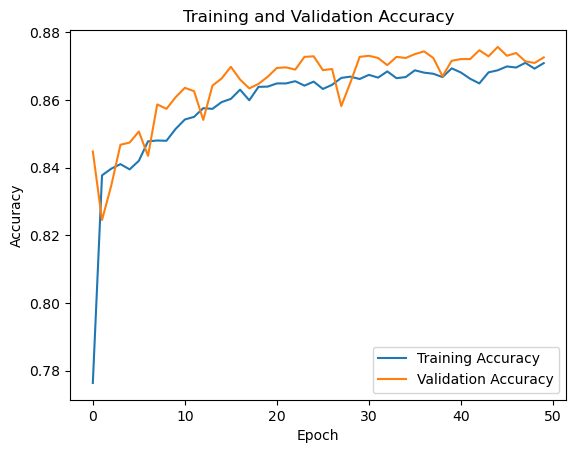

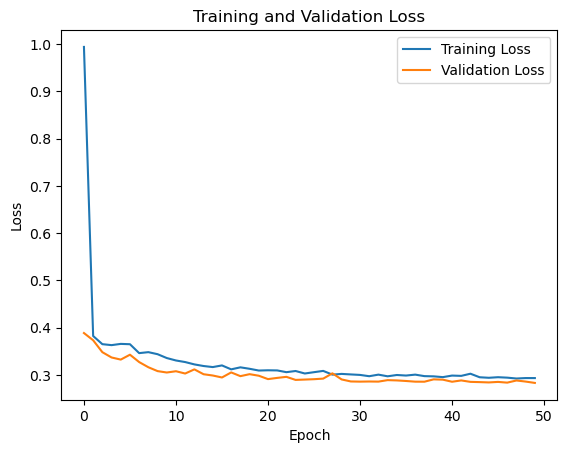

In [ ]:
import matplotlib.pyplot as plt

# Extraction des données d'accuracy et de loss depuis l'historique
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Tracé des courbes d'accuracy
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Tracé des courbes de loss
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
